In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
df=pd.read_csv("AAPL.csv",parse_dates=["Date"],index_col=[0])
print(df.index.freq)
missing_dates = pd.date_range(start=df.index.min(), end=df.index.max()).difference(df.index)
print(missing_dates)
df.shape

None
DatetimeIndex(['2022-07-02', '2022-07-03', '2022-07-04', '2022-07-09',
               '2022-07-10', '2022-07-16', '2022-07-17', '2022-07-23',
               '2022-07-24', '2022-07-30',
               ...
               '2023-05-29', '2023-06-03', '2023-06-04', '2023-06-10',
               '2023-06-11', '2023-06-17', '2023-06-18', '2023-06-19',
               '2023-06-24', '2023-06-25'],
              dtype='datetime64[ns]', length=114, freq=None)


(251, 6)

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-01,136.039993,139.039993,135.660004,138.929993,138.105347,71051600
2022-07-05,137.770004,141.610001,136.929993,141.559998,140.719742,73353800
2022-07-06,141.350006,144.119995,141.080002,142.919998,142.071655,74064300
2022-07-07,143.289993,146.550003,143.279999,146.350006,145.481308,66253700
2022-07-08,145.259995,147.550003,145.000000,147.039993,146.167191,64547800


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-26,186.830002,188.050003,185.229996,185.270004,185.270004,48088700
2023-06-27,185.889999,188.389999,185.669998,188.059998,188.059998,50730800
2023-06-28,187.929993,189.899994,187.600006,189.250000,189.250000,51216800
2023-06-29,189.080002,190.070007,188.940002,189.589996,189.589996,46347300
2023-06-30,191.630005,194.479996,191.259995,193.970001,193.970001,85069600


In [66]:
# Dropping the specified columns
df.drop(columns=["Open", "Close", "Adj Close", "Volume"], inplace=True)

# Calculate the midpoint of low and high and save it as 'Mid'
df["Mid"] = (df["Low"] + df["High"]) / 2

df

,High,Low,Mid
Date,,,
2022-07-01,139.039993,135.660004,137.349998
2022-07-05,141.610001,136.929993,139.269997
2022-07-06,144.119995,141.080002,142.599998
2022-07-07,146.550003,143.279999,144.915001
2022-07-08,147.550003,145.000000,146.275002
...,...,...,...
2023-06-26,188.050003,185.229996,186.639999
2023-06-27,188.389999,185.669998,187.029998
2023-06-28,189.899994,187.600006,188.750000


In [67]:
def train_test_split(data, prediction_size):
    train_size = int(len(data) * (1-prediction_size))
    train = pd.DataFrame(data[0:train_size])
    test = pd.DataFrame(data[train_size:len(data)])
    return train, test
df_train, df_test = train_test_split(df, 0.2)

In [68]:
print(df_train.shape)
print(df_test.shape)

(200, 3)
(51, 3)


In [69]:
# 归一化
scaler = MinMaxScaler(feature_range=(0,1))
df_train_scaled = scaler.fit_transform(df_train)
df_test_scaled = scaler.transform(df_test)

In [70]:
df_train_scaled

array([[0.23294743, 0.23472945, 0.23048131],
       [0.28606872, 0.26067407, 0.27040227],
       [0.33794955, 0.34545465, 0.33964027],
       [0.38817708, 0.39039841, 0.38777422],
       [0.40884678, 0.42553633, 0.4160516 ],
       [0.39003727, 0.40061292, 0.39390787],
       [0.42744939, 0.42655784, 0.42592785],
       [0.38610999, 0.36670068, 0.37467504],
       [0.43778424, 0.38978556, 0.4124129 ],
       [0.47726344, 0.4909091 , 0.4837301 ],
       [0.49193905, 0.46026558, 0.47551725],
       [0.48491113, 0.46455582, 0.47416571],
       [0.53637878, 0.53524001, 0.53602241],
       [0.57461785, 0.5673137 , 0.57157718],
       [0.58929317, 0.59734439, 0.59424059],
       [0.56366262, 0.5742595 , 0.56960175],
       [0.52335677, 0.54402465, 0.53394323],
       [0.61099642, 0.57180812, 0.59216141],
       [0.61740397, 0.6177734 , 0.61877537],
       [0.74121559, 0.72175698, 0.73396408],
       [0.74038862, 0.75015328, 0.7479987 ],
       [0.71599854, 0.72441285, 0.72263238],
       [0.

In [71]:
df_test_scaled

array([[0.83484931, 0.84514806, 0.84385067],
       [0.82885491, 0.84555674, 0.84104369],
       [0.79950398, 0.82369784, 0.81515752],
       [0.78193492, 0.81144032, 0.80008321],
       [0.79661024, 0.80817161, 0.80580095],
       [0.77532047, 0.78917278, 0.7854247 ],
       [0.84311706, 0.83799809, 0.84437051],
       [0.86978114, 0.89295219, 0.88574707],
       [0.88218277, 0.90847811, 0.89988559],
       [0.88011599, 0.88600608, 0.88741032],
       [0.89189755, 0.87824328, 0.8893856 ],
       [0.81169902, 0.82002048, 0.8194198 ],
       [0.96176124, 0.95178754, 0.96195028],
       [0.95245994, 0.97936682, 0.97130685],
       [0.94605206, 0.96894813, 0.96278197],
       [0.95618034, 0.97507659, 0.97099482],
       [0.96775531, 0.9805925 , 0.97962359],
       [0.95680041, 0.9566906 , 0.96195028],
       [0.93923135, 0.96629226, 0.95799987],
       [0.93778431, 0.97303387, 0.96070279],
       [0.93344355, 0.94484173, 0.94417289],
       [0.9811908 , 0.98896848, 0.99064358],
       [1.

In [10]:
# def createXY(dataset,n_past):
#     dataX = []
#     dataY = []
#     for i in range(n_past, len(dataset)):
#             dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
#             dataY.append(dataset[i,0])
#     return np.array(dataX),np.array(dataY)

In [219]:
def generate_time_series_data(input_data, history_length):
    X_data, Y_data = [], []

    for idx in range(history_length, len(input_data)):
        X_data.append(input_data[idx-history_length :idx, 0:input_data.shape[1]])
#         Y_data.append(input_data[idx, 0:input_data.shape[1]]) #这是沿第二个维度（特征）的切片，从第一个特征开始，到最后一个特征结束。简而言之，我们选择了所有的特征。
        Y_data.append(input_data[idx, 0])
    return np.array(X_data), np.array(Y_data)

The main purpose of this function is to generate a data set for supervised learning from time series data, by using a sliding window method

In [220]:
#假设你只想预测第1、第3和第5个特征（记住，索引是从0开始的）
#Y_data.append(input_data[idx, [0, 2, 4]])

In [221]:
df_train_scaled.shape[1] #总共3列值

3

In [222]:
trainX,trainY=generate_time_series_data(df_train_scaled,30)
testX,testY=generate_time_series_data(df_test_scaled,30)

In [223]:
print("trainX Shape-- ",trainX.shape) #trainX consists of 1984 time Windows, each consisting of 30 consecutive time steps with 6 features per time step
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (170, 30, 3)
trainY Shape--  (170,)


In [224]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (21, 30, 3)
testY Shape--  (21,)


In [225]:
print("trainX[0]-- \n",trainX[0])
print("\ntrainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.23294743 0.23472945 0.23048131]
 [0.28606872 0.26067407 0.27040227]
 [0.33794955 0.34545465 0.33964027]
 [0.38817708 0.39039841 0.38777422]
 [0.40884678 0.42553633 0.4160516 ]
 [0.39003727 0.40061292 0.39390787]
 [0.42744939 0.42655784 0.42592785]
 [0.38610999 0.36670068 0.37467504]
 [0.43778424 0.38978556 0.4124129 ]
 [0.47726344 0.4909091  0.4837301 ]
 [0.49193905 0.46026558 0.47551725]
 [0.48491113 0.46455582 0.47416571]
 [0.53637878 0.53524001 0.53602241]
 [0.57461785 0.5673137  0.57157718]
 [0.58929317 0.59734439 0.59424059]
 [0.56366262 0.5742595  0.56960175]
 [0.52335677 0.54402465 0.53394323]
 [0.61099642 0.57180812 0.59216141]
 [0.61740397 0.6177734  0.61877537]
 [0.74121559 0.72175698 0.73396408]
 [0.74038862 0.75015328 0.7479987 ]
 [0.71599854 0.72441285 0.72263238]
 [0.80239771 0.74729324 0.77773153]
 [0.81479966 0.82247186 0.82222678]
 [0.78710234 0.79325852 0.79342973]
 [0.82761479 0.81777327 0.82628126]
 [0.78648227 0.79836577 0.79571688]
 [0.85923939 0

In [147]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [150]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(30,3)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
parameters = {'batch_size' : [ 32, 64], # , 128, 256, 512
              'epochs' : [ 50, 100], # , 200
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 5)

C:\Users\eq220\AppData\Local\Temp\ipykernel_19948\2953331774.py:11: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))


In [59]:
import numpy as np
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from tensorflow.keras.optimizers import Adam


# 定义超参数空间
space  = [Integer(32, 256, name='lstm_neurons'),
          Real(0.1, 0.9, name='dropout_rate'),
          Real(1e-4, 1e-2, name='learning_rate', prior='log-uniform')]

# 定义优化目标函数
@use_named_args(space)
def objective(**params):
    # 在这里构建您的 LSTM 模型
    model = Sequential()
    model.add(LSTM(params['lstm_neurons'], input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1))
    
    optimizer = Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='mse')
    
    history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_data=(testX, testY), verbose=0, shuffle=False)
    
    # 返回验证损失
    return history.history['val_loss'][-1]

# 执行贝叶斯优化
res = gp_minimize(objective, space, n_calls=50, random_state=0)

# 输出最佳参数
print("Best parameters: {}".format(res.x))


Best parameters: [124, 0.37898561947511633, 0.0032450094671137284]


In [110]:
best_lstm_neurons = res.x[0]
best_dropout_rate = res.x[1]
best_learning_rate = res.x[2]

model = Sequential()
model.add(LSTM(best_lstm_neurons, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(best_dropout_rate))
model.add(Dense(1))

optimizer = Adam(learning_rate=best_learning_rate)
model.compile(optimizer=optimizer, loss='mse')

history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_data=(testX, testY), verbose=1, shuffle=False)

Epoch 1/100
6/6 [==============================] - 4s 172ms/step - loss: 0.1441 - val_loss: 0.0849
Epoch 2/100
6/6 [==============================] - 0s 44ms/step - loss: 0.0179 - val_loss: 0.0088
Epoch 3/100
6/6 [==============================] - 0s 33ms/step - loss: 0.0143 - val_loss: 0.0078
Epoch 4/100
6/6 [==============================] - 0s 60ms/step - loss: 0.0115 - val_loss: 0.0247
Epoch 5/100
6/6 [==============================] - 0s 31ms/step - loss: 0.0096 - val_loss: 0.0027
Epoch 6/100
6/6 [==============================] - 0s 50ms/step - loss: 0.0095 - val_loss: 0.0380
Epoch 7/100
6/6 [==============================] - 0s 44ms/step - loss: 0.0092 - val_loss: 0.0068
Epoch 8/100
6/6 [==============================] - 0s 38ms/step - loss: 0.0092 - val_loss: 0.0069
Epoch 9/100
6/6 [==============================] - 0s 40ms/step - loss: 0.0091 - val_loss: 0.0284
Epoch 10/100
6/6 [==============================] - 0s 63ms/step - loss: 0.0082 - val_loss: 0.0035
Epoch 11/100
6/6 [

Epoch 84/100
6/6 [==============================] - 0s 35ms/step - loss: 0.0048 - val_loss: 0.0037
Epoch 85/100
6/6 [==============================] - 0s 42ms/step - loss: 0.0054 - val_loss: 0.0089
Epoch 86/100
6/6 [==============================] - 0s 38ms/step - loss: 0.0059 - val_loss: 0.0068
Epoch 87/100
6/6 [==============================] - 0s 33ms/step - loss: 0.0052 - val_loss: 0.0034
Epoch 88/100
6/6 [==============================] - 0s 37ms/step - loss: 0.0054 - val_loss: 0.0129
Epoch 89/100
6/6 [==============================] - 0s 31ms/step - loss: 0.0044 - val_loss: 0.0053
Epoch 90/100
6/6 [==============================] - 0s 47ms/step - loss: 0.0055 - val_loss: 0.0119
Epoch 91/100
6/6 [==============================] - 1s 83ms/step - loss: 0.0052 - val_loss: 0.0021
Epoch 92/100
6/6 [==============================] - 0s 56ms/step - loss: 0.0052 - val_loss: 0.0100
Epoch 93/100
6/6 [==============================] - 0s 41ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 94/1

In [149]:
predictions = model.predict(testX)
print("predictions\n", predictions)
print("\nPredictions Shape-",predictions.shape)

1/1 [==============================] - 0s 42ms/step
predictions
 [[1.0121322]
 [1.0212622]
 [1.0535583]
 [1.0718119]
 [1.033361 ]
 [1.036097 ]
 [1.0345201]
 [1.0701721]
 [1.0903684]
 [1.1067815]
 [1.1076875]
 [1.1381135]
 [1.1491561]
 [1.1454355]
 [1.1257551]
 [1.1442852]
 [1.16065  ]
 [1.1681008]
 [1.1751436]
 [1.2031928]
 [1.2184834]]

Predictions Shape- (21, 1)


In [119]:
predictions_copies = np.repeat(predictions, 3, axis=-1)
inverse_transformed_datas = scaler.inverse_transform(predictions_copies)

In [120]:
predictions_copies

array([[1.0121322, 1.0121322, 1.0121322],
       [1.0212622, 1.0212622, 1.0212622],
       [1.0535583, 1.0535583, 1.0535583],
       [1.0718119, 1.0718119, 1.0718119],
       [1.033361 , 1.033361 , 1.033361 ],
       [1.036097 , 1.036097 , 1.036097 ],
       [1.0345201, 1.0345201, 1.0345201],
       [1.0701721, 1.0701721, 1.0701721],
       [1.0903684, 1.0903684, 1.0903684],
       [1.1067815, 1.1067815, 1.1067815],
       [1.1076875, 1.1076875, 1.1076875],
       [1.1381135, 1.1381135, 1.1381135],
       [1.1491561, 1.1491561, 1.1491561],
       [1.1454355, 1.1454355, 1.1454355],
       [1.1257551, 1.1257551, 1.1257551],
       [1.1442852, 1.1442852, 1.1442852],
       [1.16065  , 1.16065  , 1.16065  ],
       [1.1681008, 1.1681008, 1.1681008],
       [1.1751436, 1.1751436, 1.1751436],
       [1.2031928, 1.2031928, 1.2031928],
       [1.2184834, 1.2184834, 1.2184834]], dtype=float32)

In [125]:
pred=scaler.inverse_transform(prediction_copies)

In [126]:
pred

array([[176.46014, 173.43379, 174.66832],
       [177.5598 , 174.5464 , 175.76149],
       [178.92284, 175.9255 , 177.11652],
       [180.17252, 177.18991, 178.35883],
       [179.48964, 176.499  , 177.67998],
       [178.95665, 175.9597 , 177.15012],
       [178.48949, 175.48705, 176.68571],
       [179.1595 , 176.16496, 177.35179],
       [180.17706, 177.19452, 178.36334],
       [181.19916, 178.22864, 179.37941],
       [181.75429, 178.7903 , 179.93127],
       [182.8583 , 179.90735, 181.02881],
       [183.7272 , 180.78647, 181.89256],
       [183.95659, 181.01857, 182.1206 ],
       [183.39687, 180.45226, 181.56418],
       [183.53769, 180.59471, 181.70416],
       [184.06075, 181.12395, 182.22415],
       [184.56581, 181.63496, 182.72623],
       [185.01299, 182.0874 , 183.17078],
       [186.01485, 183.10107, 184.16675],
       [186.9484 , 184.04561, 185.09479]], dtype=float32)

In [127]:
original_copies_array = np.repeat(testY,3, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),3)))

In [128]:
original

array([[180.119995  , 177.13676947, 178.30661509],
       [181.779999  , 178.81633119, 179.95684037],
       [184.949997  , 182.02367725, 183.1081646 ],
       [180.119995  , 177.13676947, 178.30661509],
       [181.210007  , 178.2396237 , 179.39020607],
       [180.839996  , 177.86525333, 179.02237472],
       [182.229996  , 179.27162993, 180.40418654],
       [183.889999  , 180.95119064, 182.05441082],
       [184.149994  , 181.21424883, 182.31287425],
       [184.389999  , 181.4570815 , 182.55146543],
       [186.520004  , 183.61218164, 184.66892304],
       [186.990005  , 184.08772007, 185.13615536],
       [186.100006  , 183.18723534, 184.25139915],
       [185.410004  , 182.48910393, 183.5654618 ],
       [187.050003  , 184.14842495, 185.19579993],
       [187.559998  , 184.66442857, 185.70279066],
       [188.050003  , 185.16020668, 186.18990914],
       [188.389999  , 185.50420842, 186.5279023 ],
       [189.899994  , 187.03199377, 188.02900225],
       [190.070007  , 187.20400

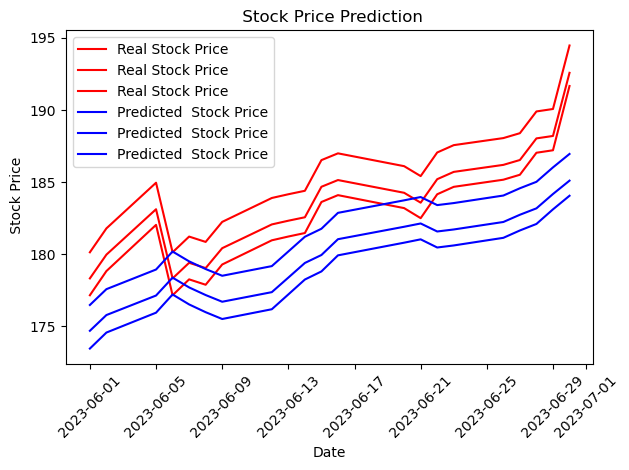

In [129]:
df_dates = df.index[-len(original):]
plt.plot(df_dates, original, color = 'red', label = 'Real Stock Price')
plt.plot(df_dates, pred, color = 'blue', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel(' Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [151]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/50
3/3 [==============================] - 3s 238ms/step - loss: 0.1934 - val_loss: 0.3638
Epoch 2/50
3/3 [==============================] - 0s 27ms/step - loss: 0.0361 - val_loss: 0.0023
Epoch 3/50
3/3 [==============================] - 0s 30ms/step - loss: 0.0538 - val_loss: 0.0016
Epoch 4/50
3/3 [==============================] - 0s 26ms/step - loss: 0.0305 - val_loss: 0.0559
Epoch 5/50
3/3 [==============================] - 0s 24ms/step - loss: 0.0199 - val_loss: 0.1499
Epoch 6/50
3/3 [==============================] - 0s 25ms/step - loss: 0.0238 - val_loss: 0.1815
Epoch 7/50
3/3 [==============================] - 0s 24ms/step - loss: 0.0268 - val_loss: 0.1466
Epoch 8/50
3/3 [==============================] - 0s 23ms/step - loss: 0.0218 - val_loss: 0.0810
Epoch 9/50
3/3 [==============================] - 0s 24ms/step - loss: 0.0177 - val_loss: 0.0302
Epoch 10/50
3/3 [==============================] - 0s 23ms/step - loss: 0.0166 - val_loss: 0.0139
Epoch 11/50
3/3 [===========

3/3 [==============================] - 0s 23ms/step - loss: 0.0126 - val_loss: 0.0499
Epoch 35/50
3/3 [==============================] - 0s 21ms/step - loss: 0.0115 - val_loss: 0.0382
Epoch 36/50
3/3 [==============================] - 0s 23ms/step - loss: 0.0105 - val_loss: 0.0339
Epoch 37/50
3/3 [==============================] - 0s 23ms/step - loss: 0.0128 - val_loss: 0.0379
Epoch 38/50
3/3 [==============================] - 0s 23ms/step - loss: 0.0110 - val_loss: 0.0398
Epoch 39/50
3/3 [==============================] - 0s 21ms/step - loss: 0.0122 - val_loss: 0.0379
Epoch 40/50
3/3 [==============================] - 0s 22ms/step - loss: 0.0115 - val_loss: 0.0381
Epoch 41/50
3/3 [==============================] - 0s 23ms/step - loss: 0.0126 - val_loss: 0.0277
Epoch 42/50
3/3 [==============================] - 0s 22ms/step - loss: 0.0119 - val_loss: 0.0292
Epoch 43/50
3/3 [==============================] - 0s 22ms/step - loss: 0.0098 - val_loss: 0.0411
Epoch 44/50
3/3 [===============

3/3 [==============================] - 0s 21ms/step - loss: 0.5044 - val_loss: 2.1199
Epoch 17/50
3/3 [==============================] - 0s 21ms/step - loss: 0.5071 - val_loss: 2.1177
Epoch 18/50
3/3 [==============================] - 0s 24ms/step - loss: 0.4912 - val_loss: 2.1155
Epoch 19/50
3/3 [==============================] - 0s 22ms/step - loss: 0.5010 - val_loss: 2.1133
Epoch 20/50
3/3 [==============================] - 0s 22ms/step - loss: 0.4854 - val_loss: 2.1113
Epoch 21/50
3/3 [==============================] - 0s 23ms/step - loss: 0.4853 - val_loss: 2.1092
Epoch 22/50
3/3 [==============================] - 0s 21ms/step - loss: 0.4830 - val_loss: 2.1070
Epoch 23/50
3/3 [==============================] - 0s 22ms/step - loss: 0.4884 - val_loss: 2.1049
Epoch 24/50
3/3 [==============================] - 0s 22ms/step - loss: 0.4767 - val_loss: 2.1028
Epoch 25/50
3/3 [==============================] - 0s 22ms/step - loss: 0.4799 - val_loss: 2.1006
Epoch 26/50
3/3 [===============

3/3 [==============================] - 0s 25ms/step - loss: 0.0059 - val_loss: 0.0093
Epoch 49/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0070 - val_loss: 0.0075
Epoch 50/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0066 - val_loss: 0.0026
Epoch 51/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0058 - val_loss: 0.0019
Epoch 52/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0068 - val_loss: 0.0041
Epoch 53/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0051 - val_loss: 0.0028
Epoch 54/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0079 - val_loss: 0.0017
Epoch 55/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0057 - val_loss: 0.0017
Epoch 56/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0063 - val_loss: 0.0017
Epoch 57/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0058 - val_loss: 0.0021
Epoch 58/100
3/3 [=====

3/3 [==============================] - 0s 23ms/step - loss: 0.0117 - val_loss: 0.0696
Epoch 31/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0138 - val_loss: 0.0639
Epoch 32/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0114 - val_loss: 0.0627
Epoch 33/100
3/3 [==============================] - 0s 30ms/step - loss: 0.0141 - val_loss: 0.0562
Epoch 34/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0131 - val_loss: 0.0610
Epoch 35/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0117 - val_loss: 0.0662
Epoch 36/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0117 - val_loss: 0.0681
Epoch 37/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0142 - val_loss: 0.0626
Epoch 38/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0134 - val_loss: 0.0575
Epoch 39/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0141 - val_loss: 0.0538
Epoch 40/100
3/3 [=====

3/3 [==============================] - 0s 24ms/step - loss: 0.2069 - val_loss: 1.2190
Epoch 13/100
3/3 [==============================] - 0s 23ms/step - loss: 0.1997 - val_loss: 1.2173
Epoch 14/100
3/3 [==============================] - 0s 21ms/step - loss: 0.1998 - val_loss: 1.2158
Epoch 15/100
3/3 [==============================] - 0s 24ms/step - loss: 0.2013 - val_loss: 1.2141
Epoch 16/100
3/3 [==============================] - 0s 22ms/step - loss: 0.2000 - val_loss: 1.2124
Epoch 17/100
3/3 [==============================] - 0s 22ms/step - loss: 0.2021 - val_loss: 1.2107
Epoch 18/100
3/3 [==============================] - 0s 25ms/step - loss: 0.2033 - val_loss: 1.2090
Epoch 19/100
3/3 [==============================] - 0s 22ms/step - loss: 0.2023 - val_loss: 1.2073
Epoch 20/100
3/3 [==============================] - 0s 23ms/step - loss: 0.2039 - val_loss: 1.2056
Epoch 21/100
3/3 [==============================] - 0s 22ms/step - loss: 0.2050 - val_loss: 1.2038
Epoch 22/100
3/3 [=====

Epoch 95/100
3/3 [==============================] - 0s 27ms/step - loss: 0.1730 - val_loss: 1.0769
Epoch 96/100
3/3 [==============================] - 0s 22ms/step - loss: 0.1744 - val_loss: 1.0752
Epoch 97/100
3/3 [==============================] - 0s 22ms/step - loss: 0.1758 - val_loss: 1.0734
Epoch 98/100
3/3 [==============================] - 0s 24ms/step - loss: 0.1762 - val_loss: 1.0716
Epoch 99/100
3/3 [==============================] - 0s 22ms/step - loss: 0.1728 - val_loss: 1.0698
Epoch 100/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1864
Epoch 1/100
3/3 [==============================] - 2s 230ms/step - loss: 0.1253 - val_loss: 0.6979
Epoch 2/100
3/3 [==============================] - 0s 24ms/step - loss: 0.1150 - val_loss: 0.6965
Epoch 3/100
3/3 [==============================] - 0s 22ms/step - loss: 0.1224 - val_loss: 0.6950
Epoch 4/100
3/3 [==============================] - 0s 24ms/step - loss: 0.1174 - val_loss: 0.6935
Epoch 5/100
3/3 [===============

3/3 [==============================] - 0s 23ms/step - loss: 0.0891 - val_loss: 0.5853
Epoch 78/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0865 - val_loss: 0.5837
Epoch 79/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0872 - val_loss: 0.5822
Epoch 80/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0889 - val_loss: 0.5808
Epoch 81/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0985 - val_loss: 0.5793
Epoch 82/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0927 - val_loss: 0.5778
Epoch 83/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0981 - val_loss: 0.5764
Epoch 84/100
3/3 [==============================] - 0s 27ms/step - loss: 0.1016 - val_loss: 0.5749
Epoch 85/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0839 - val_loss: 0.5734
Epoch 86/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0884 - val_loss: 0.5720
Epoch 87/100
3/3 [=====

2/2 [==============================] - 0s 32ms/step - loss: 0.0208 - val_loss: 0.2583
Epoch 10/50
2/2 [==============================] - 0s 32ms/step - loss: 0.0263 - val_loss: 0.2634
Epoch 11/50
2/2 [==============================] - 0s 31ms/step - loss: 0.0261 - val_loss: 0.2382
Epoch 12/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0224 - val_loss: 0.1961
Epoch 13/50
2/2 [==============================] - 0s 31ms/step - loss: 0.0207 - val_loss: 0.1511
Epoch 14/50
2/2 [==============================] - 0s 32ms/step - loss: 0.0184 - val_loss: 0.1102
Epoch 15/50
2/2 [==============================] - 0s 34ms/step - loss: 0.0183 - val_loss: 0.0819
Epoch 16/50
2/2 [==============================] - 0s 34ms/step - loss: 0.0192 - val_loss: 0.0695
Epoch 17/50
2/2 [==============================] - 0s 33ms/step - loss: 0.0189 - val_loss: 0.0767
Epoch 18/50
2/2 [==============================] - 0s 35ms/step - loss: 0.0181 - val_loss: 0.0947
Epoch 19/50
2/2 [===============

2/2 [==============================] - 0s 34ms/step - loss: 0.3262 - val_loss: 1.8924
Epoch 43/50
2/2 [==============================] - 0s 37ms/step - loss: 0.3305 - val_loss: 1.8909
Epoch 44/50
2/2 [==============================] - 0s 32ms/step - loss: 0.3251 - val_loss: 1.8894
Epoch 45/50
2/2 [==============================] - 0s 35ms/step - loss: 0.3210 - val_loss: 1.8880
Epoch 46/50
2/2 [==============================] - 0s 39ms/step - loss: 0.3289 - val_loss: 1.8865
Epoch 47/50
2/2 [==============================] - 0s 35ms/step - loss: 0.3238 - val_loss: 1.8850
Epoch 48/50
2/2 [==============================] - 0s 35ms/step - loss: 0.3210 - val_loss: 1.8835
Epoch 49/50
2/2 [==============================] - 0s 40ms/step - loss: 0.3318 - val_loss: 1.8821
Epoch 50/50
2/2 [==============================] - 0s 5ms/step - loss: 0.4028
Epoch 1/50
2/2 [==============================] - 2s 393ms/step - loss: 0.3105 - val_loss: 1.5891
Epoch 2/50
2/2 [==============================] - 0s

2/2 [==============================] - 0s 36ms/step - loss: 0.0124 - val_loss: 0.0146
Epoch 25/100
2/2 [==============================] - 0s 39ms/step - loss: 0.0106 - val_loss: 0.0105
Epoch 26/100
2/2 [==============================] - 0s 36ms/step - loss: 0.0116 - val_loss: 0.0092
Epoch 27/100
2/2 [==============================] - 0s 39ms/step - loss: 0.0137 - val_loss: 0.0112
Epoch 28/100
2/2 [==============================] - 0s 38ms/step - loss: 0.0113 - val_loss: 0.0174
Epoch 29/100
2/2 [==============================] - 0s 39ms/step - loss: 0.0111 - val_loss: 0.0226
Epoch 30/100
2/2 [==============================] - 0s 37ms/step - loss: 0.0118 - val_loss: 0.0214
Epoch 31/100
2/2 [==============================] - 0s 42ms/step - loss: 0.0104 - val_loss: 0.0166
Epoch 32/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0102 - val_loss: 0.0120
Epoch 33/100
2/2 [==============================] - 0s 36ms/step - loss: 0.0093 - val_loss: 0.0100
Epoch 34/100
2/2 [=====

2/2 [==============================] - 0s 37ms/step - loss: 0.0371 - val_loss: 0.0825
Epoch 7/100
2/2 [==============================] - 0s 36ms/step - loss: 0.0241 - val_loss: 0.1586
Epoch 8/100
2/2 [==============================] - 0s 41ms/step - loss: 0.0175 - val_loss: 0.2243
Epoch 9/100
2/2 [==============================] - 0s 36ms/step - loss: 0.0244 - val_loss: 0.2597
Epoch 10/100
2/2 [==============================] - 0s 41ms/step - loss: 0.0273 - val_loss: 0.2588
Epoch 11/100
2/2 [==============================] - 0s 35ms/step - loss: 0.0262 - val_loss: 0.2294
Epoch 12/100
2/2 [==============================] - 0s 40ms/step - loss: 0.0220 - val_loss: 0.1885
Epoch 13/100
2/2 [==============================] - 0s 33ms/step - loss: 0.0188 - val_loss: 0.1448
Epoch 14/100
2/2 [==============================] - 0s 37ms/step - loss: 0.0189 - val_loss: 0.1063
Epoch 15/100
2/2 [==============================] - 0s 41ms/step - loss: 0.0193 - val_loss: 0.0800
Epoch 16/100
2/2 [========

Epoch 89/100
2/2 [==============================] - 0s 34ms/step - loss: 0.0113 - val_loss: 0.0331
Epoch 90/100
2/2 [==============================] - 0s 36ms/step - loss: 0.0124 - val_loss: 0.0353
Epoch 91/100
2/2 [==============================] - 0s 34ms/step - loss: 0.0112 - val_loss: 0.0475
Epoch 92/100
2/2 [==============================] - 0s 34ms/step - loss: 0.0129 - val_loss: 0.0584
Epoch 93/100
2/2 [==============================] - 0s 34ms/step - loss: 0.0116 - val_loss: 0.0579
Epoch 94/100
2/2 [==============================] - 0s 35ms/step - loss: 0.0120 - val_loss: 0.0530
Epoch 95/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0120 - val_loss: 0.0457
Epoch 96/100
2/2 [==============================] - 0s 35ms/step - loss: 0.0112 - val_loss: 0.0336
Epoch 97/100
2/2 [==============================] - 0s 36ms/step - loss: 0.0112 - val_loss: 0.0251
Epoch 98/100
2/2 [==============================] - 0s 36ms/step - loss: 0.0128 - val_loss: 0.0255
Epoch 99/1

2/2 [==============================] - 0s 41ms/step - loss: 0.3351 - val_loss: 1.8223
Epoch 72/100
2/2 [==============================] - 0s 35ms/step - loss: 0.3463 - val_loss: 1.8211
Epoch 73/100
2/2 [==============================] - 0s 44ms/step - loss: 0.3428 - val_loss: 1.8200
Epoch 74/100
2/2 [==============================] - 0s 32ms/step - loss: 0.3467 - val_loss: 1.8188
Epoch 75/100
2/2 [==============================] - 0s 32ms/step - loss: 0.3429 - val_loss: 1.8176
Epoch 76/100
2/2 [==============================] - 0s 32ms/step - loss: 0.3423 - val_loss: 1.8163
Epoch 77/100
2/2 [==============================] - 0s 33ms/step - loss: 0.3394 - val_loss: 1.8151
Epoch 78/100
2/2 [==============================] - 0s 34ms/step - loss: 0.3465 - val_loss: 1.8140
Epoch 79/100
2/2 [==============================] - 0s 35ms/step - loss: 0.3439 - val_loss: 1.8128
Epoch 80/100
2/2 [==============================] - 0s 40ms/step - loss: 0.3451 - val_loss: 1.8116
Epoch 81/100
2/2 [=====

2/2 [==============================] - 0s 31ms/step - loss: 0.2492 - val_loss: 1.2642
Epoch 54/100
2/2 [==============================] - 0s 32ms/step - loss: 0.2488 - val_loss: 1.2632
Epoch 55/100
2/2 [==============================] - 0s 35ms/step - loss: 0.2516 - val_loss: 1.2621
Epoch 56/100
2/2 [==============================] - 0s 35ms/step - loss: 0.2584 - val_loss: 1.2610
Epoch 57/100
2/2 [==============================] - 0s 37ms/step - loss: 0.2603 - val_loss: 1.2599
Epoch 58/100
2/2 [==============================] - 0s 36ms/step - loss: 0.2580 - val_loss: 1.2588
Epoch 59/100
2/2 [==============================] - 0s 38ms/step - loss: 0.2590 - val_loss: 1.2576
Epoch 60/100
2/2 [==============================] - 0s 37ms/step - loss: 0.2684 - val_loss: 1.2566
Epoch 61/100
2/2 [==============================] - 0s 40ms/step - loss: 0.2545 - val_loss: 1.2556
Epoch 62/100
2/2 [==============================] - 0s 43ms/step - loss: 0.2515 - val_loss: 1.2546
Epoch 63/100
2/2 [=====

6/6 [==============================] - 0s 17ms/step - loss: 0.0089 - val_loss: 0.0171
Epoch 36/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0089 - val_loss: 0.0143
Epoch 37/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0105 - val_loss: 0.0279
Epoch 38/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0090 - val_loss: 0.0029
Epoch 39/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0097 - val_loss: 0.0292
Epoch 40/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0100 - val_loss: 0.0119
Epoch 41/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0084 - val_loss: 0.0142
Epoch 42/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0093 - val_loss: 0.0296
Epoch 43/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0084 - val_loss: 0.0046
Epoch 44/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0088 - val_loss: 0.0150
Epoch 45/100
6/6 [=====

In [226]:
grid_search.best_params_

{'batch_size': 32, 'epochs': 100, 'optimizer': 'adam'}

In [227]:
my_model=grid_search.best_estimator_.model

In [228]:
my_model

1/1 [==============================] - 0s 21ms/step - loss: 0.0079
Test Loss: 0.007949231192469597
1/1 [==============================] - 0s 18ms/step


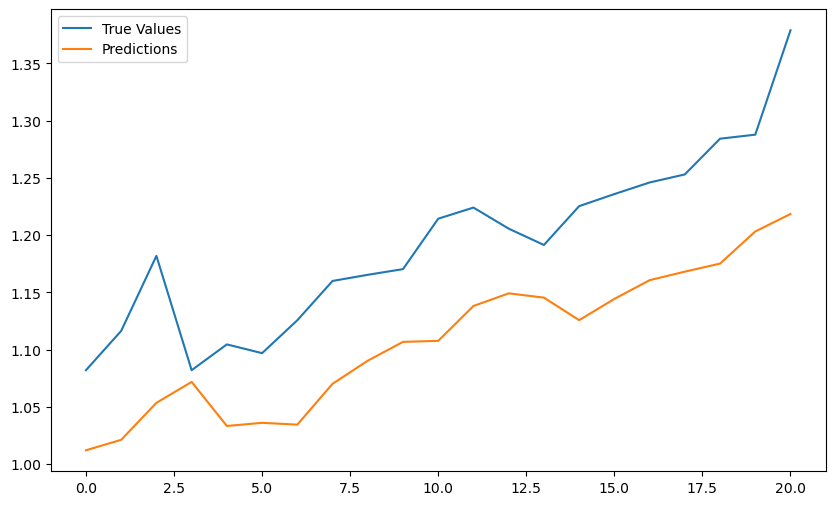

In [229]:
loss = model.evaluate(testX, testY, verbose=1)
print("Test Loss:", loss)
predictions = model.predict(testX)

plt.figure(figsize=(10,6))
plt.plot(testY, label='True Values')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()

In [231]:
model.save("my_model.h5")
from tensorflow.keras.models import load_model

loaded_model = load_model("my_model.h5")

In [232]:
prediction=my_model.predict(testX)

1/1 [==============================] - 0s 18ms/step


In [233]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[1.0461589]
 [1.0653058]
 [1.0930464]
 [1.1141146]
 [1.0929615]
 [1.0798323]
 [1.0720545]
 [1.0957136]
 [1.1228768]
 [1.1475275]
 [1.157166 ]
 [1.1809503]
 [1.1984844]
 [1.2010113]
 [1.1836338]
 [1.1875573]
 [1.2032344]
 [1.2164115]
 [1.2268113]
 [1.2515005]
 [1.2737054]]

Prediction Shape- (21, 1)


In [234]:
# scaler.inverse_transform(prediction)

In [235]:
prediction_copies = np.repeat(prediction, 3, axis=-1)
inverse_transformed_data = scaler.inverse_transform(prediction_copies)

In [236]:
# prediction_copies_array = np.repeat(prediction, 6, axis=-1)

In [237]:
prediction_copies.shape

(21, 3)

In [238]:
prediction_copies

array([[1.0461589, 1.0461589, 1.0461589],
       [1.0653058, 1.0653058, 1.0653058],
       [1.0930464, 1.0930464, 1.0930464],
       [1.1141146, 1.1141146, 1.1141146],
       [1.0929615, 1.0929615, 1.0929615],
       [1.0798323, 1.0798323, 1.0798323],
       [1.0720545, 1.0720545, 1.0720545],
       [1.0957136, 1.0957136, 1.0957136],
       [1.1228768, 1.1228768, 1.1228768],
       [1.1475275, 1.1475275, 1.1475275],
       [1.157166 , 1.157166 , 1.157166 ],
       [1.1809503, 1.1809503, 1.1809503],
       [1.1984844, 1.1984844, 1.1984844],
       [1.2010113, 1.2010113, 1.2010113],
       [1.1836338, 1.1836338, 1.1836338],
       [1.1875573, 1.1875573, 1.1875573],
       [1.2032344, 1.2032344, 1.2032344],
       [1.2164115, 1.2164115, 1.2164115],
       [1.2268113, 1.2268113, 1.2268113],
       [1.2515005, 1.2515005, 1.2515005],
       [1.2737054, 1.2737054, 1.2737054]], dtype=float32)

In [239]:
pred=scaler.inverse_transform(prediction_copies)[:,:]

In [240]:
# pred_high=scaler.inverse_transform(prediction_copies)[:,1]

In [241]:
# pred_high

In [242]:
pred

array([[178.38316, 175.37947, 176.58002],
       [179.3095 , 176.31671, 177.50089],
       [180.65158, 177.67462, 178.83507],
       [181.67087, 178.7059 , 179.84834],
       [180.64748, 177.67047, 178.83098],
       [180.01228, 177.02779, 178.19954],
       [179.63599, 176.64706, 177.82547],
       [180.78061, 177.80518, 178.96335],
       [182.09477, 179.13481, 180.26976],
       [183.28737, 180.34146, 181.45532],
       [183.75368, 180.81328, 181.9189 ],
       [184.90437, 181.97751, 183.0628 ],
       [185.75267, 182.83582, 183.9061 ],
       [185.87492, 182.95949, 184.02763],
       [185.0342 , 182.10887, 183.19186],
       [185.22401, 182.30092, 183.38057],
       [185.98247, 183.06831, 184.13455],
       [186.61998, 183.71333, 184.76831],
       [187.12312, 184.2224 , 185.2685 ],
       [188.3176 , 185.43094, 186.45592],
       [189.39186, 186.51787, 187.52386]], dtype=float32)

In [243]:
# pred=scaler.inverse_transform(np.reshape(prediction_copies,(len(prediction),6)))[:,0]
# 这是一个数组切片操作，用于选择重塑并进行逆变换后的数组的第一列
# 虽然 prediction_copies_array 有6列，但你只对第一列（索引为0的列）感兴趣

In [252]:
original_copie_array = np.repeat(testY,3, axis=-1)

original_copie_array.shape

original=scaler.inverse_transform(np.reshape(original_copie_array,(len(testY),3)))[:,0]

In [253]:
# # original_copies_array = np.repeat(testY,3, axis=-1)

# original_copies_array.shape

# original=scaler.inverse_transform(np.reshape(testY,(len(testY),3)))

In [254]:
# original_high=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),6)))[:,1]

In [255]:
# original_high

In [256]:
original

array([180.119995, 181.779999, 184.949997, 180.119995, 181.210007,
       180.839996, 182.229996, 183.889999, 184.149994, 184.389999,
       186.520004, 186.990005, 186.100006, 185.410004, 187.050003,
       187.559998, 188.050003, 188.389999, 189.899994, 190.070007,
       194.479996])

In [257]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- ",original)

Pred Values--  [[178.38316 175.37947 176.58002]
 [179.3095  176.31671 177.50089]
 [180.65158 177.67462 178.83507]
 [181.67087 178.7059  179.84834]
 [180.64748 177.67047 178.83098]
 [180.01228 177.02779 178.19954]
 [179.63599 176.64706 177.82547]
 [180.78061 177.80518 178.96335]
 [182.09477 179.13481 180.26976]
 [183.28737 180.34146 181.45532]
 [183.75368 180.81328 181.9189 ]
 [184.90437 181.97751 183.0628 ]
 [185.75267 182.83582 183.9061 ]
 [185.87492 182.95949 184.02763]
 [185.0342  182.10887 183.19186]
 [185.22401 182.30092 183.38057]
 [185.98247 183.06831 184.13455]
 [186.61998 183.71333 184.76831]
 [187.12312 184.2224  185.2685 ]
 [188.3176  185.43094 186.45592]
 [189.39186 186.51787 187.52386]]

Original Values--  [180.119995 181.779999 184.949997 180.119995 181.210007 180.839996
 182.229996 183.889999 184.149994 184.389999 186.520004 186.990005
 186.100006 185.410004 187.050003 187.559998 188.050003 188.389999
 189.899994 190.070007 194.479996]


In [258]:
import matplotlib.pyplot as plt

In [259]:
df_dates = df.index[-len(original):]

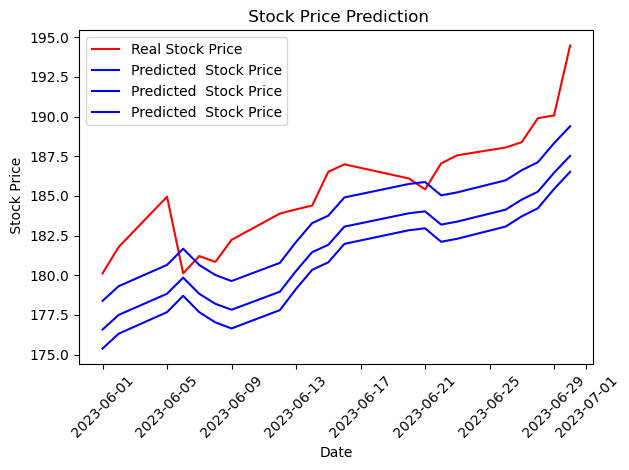

In [260]:
plt.plot(df_dates, original, color = 'red', label = 'Real Stock Price')
plt.plot(df_dates, pred, color = 'blue', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel(' Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [106]:
df_30_days_past=df.iloc[-30:,:]

In [107]:
df_30_days_past

,High,Low,Mid
Date,,,
2023-05-18,175.240005,172.580002,173.910004
2023-05-19,176.389999,174.940002,175.665000
2023-05-22,174.710007,173.449997,174.080002
2023-05-23,173.380005,171.279999,172.330002
2023-05-24,172.419998,170.520004,171.470001
2023-05-25,173.899994,171.690002,172.794998
2023-05-26,175.770004,173.110001,174.440002
2023-05-30,178.990005,176.570007,177.780006
2023-05-31,179.350006,176.759995,178.055001


# END!!!!